In [1]:
import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt
import pprint

import os


,CODIMUNI,NOMMUNI,CAPMUNI,AREAM5000,CODICOMAR,NOMCOMAR,CAPCOMAR,CODIVEGUE,NOMVEGUE,CAPVEGUE,CODIPROV,NOMPROV,CAPPROV,geometry
0,250019,Abella de la Conca,Abella de la Conca,77.970082,25,Pallars Jussà,Tremp,06,Alt Pirineu,*,25,Lleida,Lleida,"POLYGON ((346712.091 4676851.376, 347046.795 4..."
1,080018,Abrera,Abrera,19.978096,11,Baix Llobregat,Sant Feliu de Llobregat,01,Barcelona,Barcelona,08,Barcelona,Barcelona,"POLYGON ((410315.500 4598888.500, 410888.800 4..."
2,250024,Àger,Àger,160.202629,23,Noguera,Balaguer,03,Lleida,Lleida,25,Lleida,Lleida,"POLYGON ((308157.549 4660767.518, 308220.898 4..."
3,250030,Agramunt,Agramunt,79.359535,38,Urgell,Tàrrega,03,Lleida,Lleida,25,Lleida,Lleida,"MULTIPOLYGON (((342659.900 4635474.900, 343006..."
4,080023,Aguilar de Segarra,Aguilar de Segarra,43.219825,07,Bages,Manresa,07,Catalunya Central,*,08,Barcelona,Barcelona,"POLYGON ((385155.746 4625034.736, 385288.746 4..."


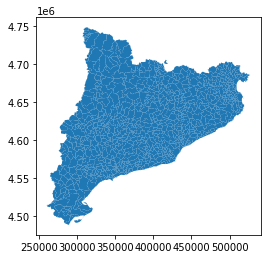

In [2]:
cat_maps_muni = gpd.read_file('divisions-administratives-v2r1-municipis-1000000-20220801.shp', crs="EPSG:4326")
display(cat_maps_muni.head())
cat_maps_muni.plot()
plt.show()

In [3]:
# calculate centroids of areas as POINTS
cat_maps_muni["centroids"] = cat_maps_muni.geometry.centroid
# set column "centroids" as the new geometry of the GeoDataFrame
cat_maps_muni = cat_maps_muni.set_geometry("centroids")
cat_maps_muni

,CODIMUNI,NOMMUNI,CAPMUNI,AREAM5000,CODICOMAR,NOMCOMAR,CAPCOMAR,CODIVEGUE,NOMVEGUE,CAPVEGUE,CODIPROV,NOMPROV,CAPPROV,geometry,centroids
0,250019,Abella de la Conca,Abella de la Conca,77.970082,25,Pallars Jussà,Tremp,06,Alt Pirineu,*,25,Lleida,Lleida,"POLYGON ((346712.091 4676851.376, 347046.795 4...",POINT (344572.922 4671012.648)
1,080018,Abrera,Abrera,19.978096,11,Baix Llobregat,Sant Feliu de Llobregat,01,Barcelona,Barcelona,08,Barcelona,Barcelona,"POLYGON ((410315.500 4598888.500, 410888.800 4...",POINT (409067.153 4596662.194)
2,250024,Àger,Àger,160.202629,23,Noguera,Balaguer,03,Lleida,Lleida,25,Lleida,Lleida,"POLYGON ((308157.549 4660767.518, 308220.898 4...",POINT (312712.960 4652313.813)
3,250030,Agramunt,Agramunt,79.359535,38,Urgell,Tàrrega,03,Lleida,Lleida,25,Lleida,Lleida,"MULTIPOLYGON (((342659.900 4635474.900, 343006...",POINT (339503.270 4628009.818)
4,080023,Aguilar de Segarra,Aguilar de Segarra,43.219825,07,Bages,Manresa,07,Catalunya Central,*,08,Barcelona,Barcelona,"POLYGON ((385155.746 4625034.736, 385288.746 4...",POINT (385057.136 4620670.181)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
942,252555,Vinaixa,Vinaixa,37.470000,18,Garrigues,les Borges Blanques,03,Lleida,Lleida,25,Lleida,Lleida,"POLYGON ((330747.400 4593793.300, 330902.920 4...",POINT (330908.990 4589583.806)
943,431779,Vinebre,Vinebre,26.508105,30,Ribera d'Ebre,Móra d'Ebre,05,Terres de l'Ebre,Tortosa,43,Tarragona,Tarragona,"POLYGON ((306031.600 4568564.200, 306028.880 4...",POINT (300704.049 4565478.763)
944,431785,Vinyols i els Arcs,Vinyols,10.912440,08,Baix Camp,Reus,04,Camp de Tarragona,Tarragona,43,Tarragona,Tarragona,"POLYGON ((335519.900 4554463.200, 335590.300 4...",POINT (336640.621 4551566.259)
945,083089,Viver i Serrateix,Serrateix,67.170259,14,Berguedà,Berga,07,Catalunya Central,*,08,Barcelona,Barcelona,"POLYGON ((399922.400 4650555.600, 399927.143 4...",POINT (399994.536 4644682.141)


<AxesSubplot:>

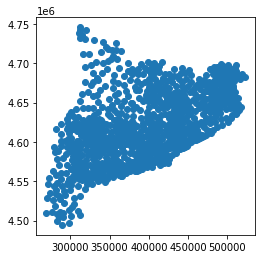

In [4]:
cat_maps_muni.plot()